# Feature Selection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("../Datasets/Companies/SmallCompanies.csv")

df.head()

,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
0,AK_2013_VCP_1,3/1/2013,180000.0,0.0,Metro,Non-LMI,0.0,5.0,541511,3.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
1,AK_2013_VCP_3,12/30/2013,265000.0,0.0,Metro,Non-LMI,0.0,7.0,541511,2.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
2,AK_2014_VCP_1,4/11/2014,199500.0,0.0,Metro,Non-LMI,0.0,2.0,336612,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
3,AK_2014_VCP_2,5/15/2014,125000.0,0.0,Metro,LMI,1494916.0,8.0,451110,8.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0
4,AK_2014_VCP_3,9/15/2014,120000.0,0.0,Metro,Non-LMI,41000.0,0.0,336612,0.0,Loan Fund,"Wages, Working Capital, & Professional Services",2014.0,Early Stage,Unknown,0.0


In [3]:
print("Dataset dimensions:", df.shape)

Dataset dimensions: (18584, 16)


In [4]:
# Get concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   loan_investment_amount         18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   full_time_employees            18584 non-null  float64
 8   naics_code                     18584 non-null  int64  
 9   jobs_created                   18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [5]:
# Filter out the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculate the number of unique values for each categorical column
unique_counts_categorical = df[categorical_columns].nunique()

unique_counts_categorical

unique_id                        18563
disbursement_date                 1572
metro_type                           2
LMI_type                             2
lender_type_category                 6
optional_primary_use_of_funds        5
optional_stage                       5
active_status                       10
dtype: int64

## Encoding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18584 entries, 0 to 18583
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unique_id                      18584 non-null  object 
 1   disbursement_date              18584 non-null  object 
 2   loan_investment_amount         18584 non-null  float64
 3   lender_insurance_premium       18584 non-null  float64
 4   metro_type                     18584 non-null  object 
 5   LMI_type                       18584 non-null  object 
 6   revenue                        18584 non-null  float64
 7   full_time_employees            18584 non-null  float64
 8   naics_code                     18584 non-null  int64  
 9   jobs_created                   18584 non-null  float64
 10  lender_type_category           18584 non-null  object 
 11  optional_primary_use_of_funds  18584 non-null  object 
 12  optional_revenue_yr_confirmed  18584 non-null 

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.select_dtypes(include=['object']):
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
0,0,627,180000.0,0.0,0,1,0.0,5.0,541511,3.0,3,4,2014.0,0,8,0.0
1,1,481,265000.0,0.0,0,1,0.0,7.0,541511,2.0,3,4,2014.0,0,8,0.0
2,2,768,199500.0,0.0,0,1,0.0,2.0,336612,8.0,3,4,2014.0,0,8,0.0
3,3,923,125000.0,0.0,0,0,1494916.0,8.0,451110,8.0,3,4,2014.0,0,8,0.0
4,4,1470,120000.0,0.0,0,1,41000.0,0.0,336612,0.0,3,4,2014.0,0,8,0.0


## Standardization

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled_df.head()

,unique_id,disbursement_date,loan_investment_amount,lender_insurance_premium,metro_type,LMI_type,revenue,full_time_employees,naics_code,jobs_created,lender_type_category,optional_primary_use_of_funds,optional_revenue_yr_confirmed,optional_stage,active_status,support_amount
0,-1.732158,-0.372615,-0.034275,-0.317853,-0.342781,0.888443,-0.041744,0.540698,0.150195,0.104501,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724
1,-1.731971,-0.689557,0.074444,-0.317853,-0.342781,0.888443,-0.041744,1.167584,0.150195,-0.013027,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724
2,-1.731784,-0.066527,-0.009333,-0.317853,-0.342781,0.888443,-0.041744,-0.399632,-1.068931,0.692143,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724
3,-1.731598,0.269952,-0.104622,-0.317853,-0.342781,-1.125564,0.037716,1.481027,-0.387681,0.692143,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724
4,-1.731411,1.457399,-0.111017,-0.317853,-0.342781,0.888443,-0.039564,-1.026518,-1.068931,-0.248084,0.671973,0.557309,0.092237,-0.148228,0.21787,-0.187724


## PCA

In [10]:
from sklearn.decomposition import PCA

# Initialize PCA with the number of components you want
pca = PCA(n_components=16)

# Fit PCA to the scaled data
pca.fit(scaled_df)

# Transform the data to the new feature space
transformed_data = pca.transform(scaled_df)

# Convert the transformed data to a DataFrame
selected_features = pd.DataFrame(transformed_data, columns=[f'PC{i}' for i in range(1, 17)])


selected_features



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.598417,0.135481,0.143869,0.662107,-0.233395,0.578659,0.419967,-0.293361,-0.750713,-0.217766,-0.639123,0.466245,0.868980,-0.804382,-0.047898,-1.105690
1,-0.421481,0.259340,0.060383,0.858164,-0.066973,0.689060,0.644581,-0.458799,-0.578243,-0.579177,-0.939939,0.669891,0.831380,-0.912868,-0.090801,-1.061408
2,-0.687413,0.185545,0.502969,-0.007808,-0.719014,1.238917,0.171718,-0.110228,-0.509659,0.758815,-0.017812,0.625898,0.900650,-0.641366,-0.034261,-1.168356
3,-0.625040,0.188246,0.472354,0.874089,-0.091767,0.177292,-0.383066,0.153612,1.092989,-0.677059,-0.364145,1.472522,1.026272,-0.510401,-0.108345,-1.168048
4,-1.136896,-0.045861,0.096938,-0.312985,-1.070298,1.168479,-1.118113,0.594925,-0.678063,0.925706,-0.261242,-0.146928,0.642796,-0.667867,0.122785,-1.216118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18579,2.194804,1.185985,3.429631,-0.435618,0.377821,-1.532304,1.467286,-0.074926,1.352812,0.996279,-2.035160,-2.679528,-2.013283,2.345651,-0.798513,0.449111
18580,2.237619,-0.010286,0.156053,-0.595974,0.379286,0.468092,1.217857,-0.634672,-0.018436,0.003298,-1.650454,-0.312219,-0.746192,1.974824,-0.988164,0.302674
18581,2.959538,0.559722,0.900641,-1.892977,1.217314,-2.489154,1.243544,-0.231865,1.237584,-0.968790,-1.078364,-1.032038,-0.418325,0.456437,-1.394697,0.124105
18582,1.233083,-0.781200,0.568646,-0.870219,0.685208,-0.841161,1.143159,-0.530390,-1.467237,0.322820,-0.168417,-0.712883,-1.038858,2.622396,-1.118709,-0.001660


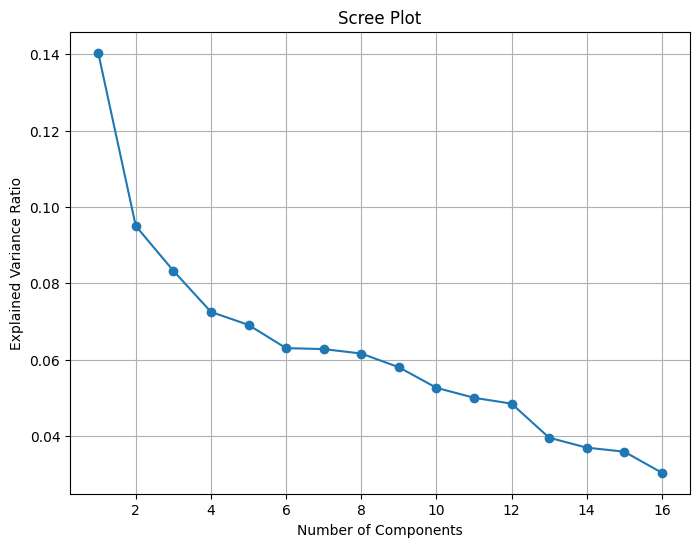

In [11]:
# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

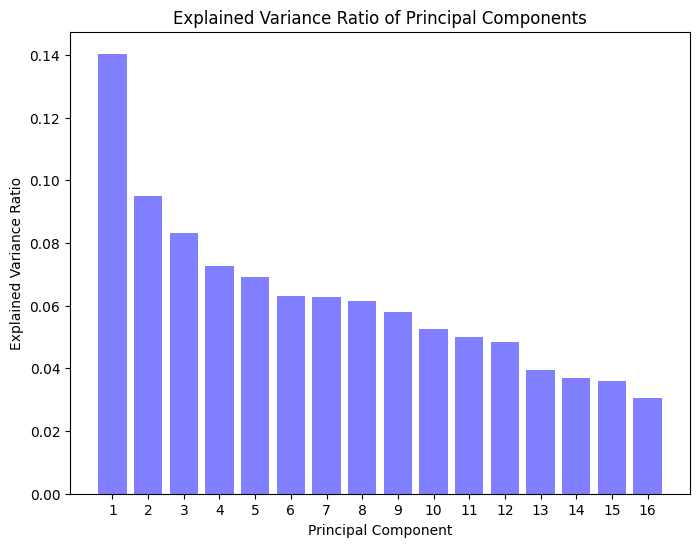

In [12]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, color='blue', alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, pca.n_components_ + 1))
plt.show()


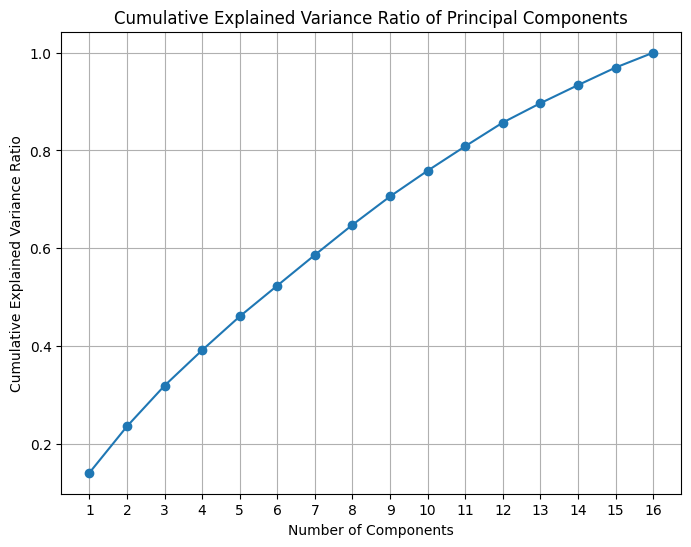

In [13]:

# Assuming pca is your PCA object
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio_cumulative) + 1))
plt.grid(True)
plt.show()
